### AUTORA
**Mar Iborra Granel**

### CURSO
_3 MAIS_

# Tarea calificada 1 INAR_2023


## Cat vs. Dog Image Classification

Este ejercicio consiste en desarrollar un modelo deep learning CNN (aunque eres libre de probar otras alternativas) para una dataset que contiene imágenes de perros y gatos (exclusivamente). 

Se debe entregar este notebook (como mínimo, se pueden entregar varios notebooks en un .zip) con los siguientes puntos:

1. Carga y pre-proceso de ficheros de datos. (**YA DESARROLLADO, SOLO DEBE SER EJECUTADO**)
2. Configura un (uno al menos, puedes presentar más) modelo CNN para la clasificación perro versus gato.
3. Realiza el entrenamiento y prueba el rendimiento del modelo con el conjunto de test que hemos recopilado en clase este año.

El dataset y la primera parte de este notebook están obtenidos, con infinitas gracias, de

https://colab.research.google.com/github/google/eng-edu/blob/master/ml/pc/exercises/image_classification_part1.ipynb

Por tanto se debe mencionar la siguiente licencia:

#### Copyright 2018 Google LLC.
Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License.

You may obtain a copy of the License at

 https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and limitations under the License.


## 1. Carga y Pre-Proceso de Datos

Descarga por favor el .zip 

cats_and_dogs_filtered.zip

del Blackboard de la tarea en la misma ruta (carpeta) de este notebook y ejecuta los siguientes pasos.

(o si usas Google Colab lo tienes en la dirección anterior)

Mantengo la nota original del origen del dataset.


**NOTE:** The 2,000 images used in this exercise are excerpted from the ["Dogs vs. Cats" dataset](https://www.kaggle.com/c/dogs-vs-cats/data) available on Kaggle, which contains 25,000 images. Here, we use a subset of the full dataset to decrease training time for educational purposes.

In [1]:
import os
import zipfile

local_zip = './dataset_tarea_1_2023.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('')
zip_ref.close()

The contents of the .zip are extracted to the base directory `cats_and_dogs_filtered`, which contains `train` and `validation` subdirectories for the training and validation datasets (see the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/validation/check-your-intuition) for a refresher on training, validation, and test sets), which in turn each contain `cats` and `dogs` subdirectories. 

NOTA: Además, en el mismo directorio donde se descomprime el cats_and_dogs_filtered descomprime el test.zip en un directorio test. 

Si todo está bien nombrado y "colgando" de la misma ruta, te saldrán los siguientes tamaños de conjuntos train     /validation / test (un poco más adelante)

- total training cat images: 1000
- total training dog images: 1000
- total validation cat images: 500
- total validation dog images: 500
- total test cat images: 155
- total test dog images: 158



In [2]:
base_dir = './dataset_tarea_1_2023'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directory with our test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')

# Directory with our test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')

Now, let's see what the filenames look like in the `cats` and `dogs` `train` directories (file naming conventions are the same in the `validation` directory):

In [3]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


Let's find out the total number of cat and dog images in the `train` and `validation` directories:

In [4]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 461
total test dog images: 277


For both cats and dogs, we have 1,000 training images and 500 test images.

Now let's take a look at a few pictures to get a better sense of what the cat and dog datasets look like. First, configure the matplot parameters:

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 cat and 8 dog pictures. You can rerun the cell to see a fresh batch each time:

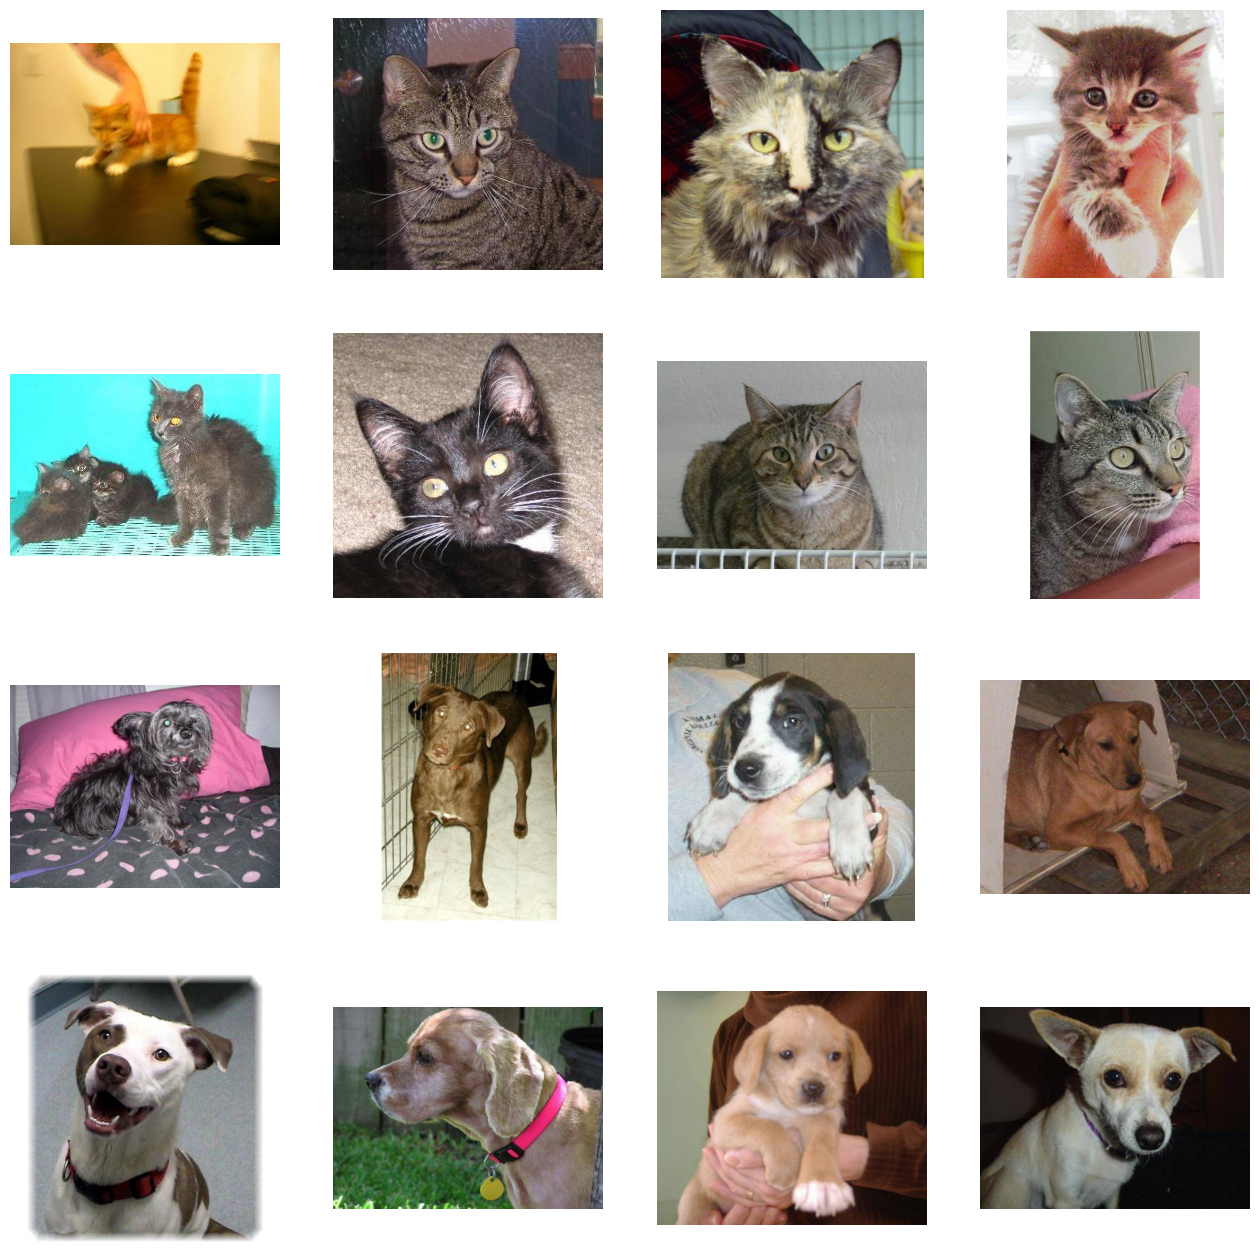

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


### Data Preprocessing

Let's set up data generators that will read pictures in our source folders, convert them to `float32` tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of 20 images of size 150x150 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the Keras model methods that accept data generators as inputs: `fit_generator`, `evaluate_generator`, and `predict_generator`.

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

base_dir = './dataset_tarea_1_2023'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


# Flow training images in batches of 20 using train_datagen generator
train_generator = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False)


# Flow training images in batches of 20 using train_datagen generator
validation_generator = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False)

# Flow training images in batches of 20 using train_datagen generator
test_generator = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False)



Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 738 files belonging to 2 classes.


# 2. Modelo CNN Personalizado

In [8]:
#Definicion modelo 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization


model = Sequential()

# Capa Convolucional 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Capa Convolucional 2 - Añadir una nueva capa convolucional
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Capa Convolucional 3 - Añadir una nueva capa convolucional
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Capa Convolucional 4 - Añadir una nueva capa convolucional
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Aplanamiento y Capas Densas
model.add(Flatten())

# Capa Densa con Dropout
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Añadir Dropout para regularización
model.add(BatchNormalization())

# Capa de Salida
model.add(Dense(2, activation='softmax'))  # 2 neuronas para perros y gatos

#### Configuración del Modelo CNN

Este modelo CNN está diseñado para la tarea de clasificar imágenes entre dos categorías: perros y gatos. Utiliza una arquitectura jerárquica con capas convolucionales que incrementan en profundidad y técnicas de regularización para optimizar la generalización. A continuación, se describen sus componentes principales:

1. **Capas Convolucionales:**
   - **Primera Capa Convolucional:** Utiliza 32 filtros de tamaño 3x3 con activación 'relu', adecuados para detectar patrones básicos en imágenes de entrada de 256x256 píxeles en color. Se aplica normalización por lotes después de esta capa para estabilizar la activación durante el entrenamiento.
   - **Capas Convolucionales Adicionales:** La profundidad de las capas aumenta a 64, 128 y 256 filtros, lo que permite al modelo identificar patrones más complejos. Cada capa convolucional está seguida de normalización por lotes y una capa de pooling para reducir las dimensiones y prevenir el sobreajuste.

2. **Capa de Pooling:**
   - Se usa `MaxPooling2D((2, 2))` después de cada capa convolucional para disminuir las dimensiones de los mapas de características y reducir los cálculos necesarios.

3. **Aplanamiento y Capas Densas:**
   - La capa `Flatten()` transforma los mapas de características 2D en un vector 1D. Una capa densa con 512 neuronas se utiliza para aprender combinaciones complejas de características, con un `Dropout(0.5)` para la regularización.

4. **Capa de Salida:**
   - La capa `Dense(2, activation='softmax')` tiene dos neuronas, una para cada clase objetivo. La función de activación 'softmax' produce una distribución de probabilidad para facilitar la clasificación precisa.

El modelo se compila con 'rmsprop' como optimizador y 'categorical_crossentropy' para la función de pérdida, ambos adecuados para clasificación multiclase. La métrica de 'accuracy' proporciona una evaluación directa del rendimiento del modelo.

El diseño del modelo busca un equilibrio entre la capacidad de extracción de características y la prevención del sobreajuste para lograr una clasificación precisa de imágenes de perros y gatos.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

#### Resumen de la Arquitectura del Modelo CNN

El modelo CNN diseñado se compone de una secuencia de capas convolucionales, normalización por lotes, pooling y capas densas:

1. **Capas Convolucionales:**
   - **`conv2d`:** La primera capa convolucional tiene 32 filtros de 3x3, y procesa la entrada para producir un conjunto de 32 mapas de características de tamaño 254x254. 
   - **`conv2d_1`:** Con 64 filtros, esta capa aumenta la profundidad de los mapas de características a 125x125.
   - **`conv2d_2`:** Esta capa eleva aún más la profundidad con 128 filtros, generando mapas de 60x60.
   - **`conv2d_3`:** La última capa convolucional utiliza 256 filtros para obtener mapas de 28x28, capturando características altamente detalladas.

2. **Normalización por Lotes:**
   - Cada capa convolucional está seguida por `batch_normalization`, que estabiliza las activaciones y acelera el entrenamiento.

3. **Pooling:**
   - Después de cada capa de normalización, se aplica `max_pooling2d` para reducir las dimensiones de los mapas de características a la mitad, lo que disminuye la cantidad de parámetros y computación requerida.

4. **Aplanamiento y Capa Densa:**
   - La capa `flatten` transforma la salida 2D en un vector 1D de 50176 elementos.
   - La capa `dense` con 512 unidades permite al modelo aprender patrones más complejos, con `dropout` aplicado para evitar el sobreajuste.

5. **Capa de Salida:**
   - La capa final `dense_1` con 2 unidades y activación 'softmax' clasifica las imágenes en las categorías de perros y gatos.

**Parámetros:**
- **Total de Parámetros:** 26,084,034, de los cuales 26,082,050 son entrenables. Los parámetros no entrenables suman 1,984, lo cual es un pequeño porcentaje del total, mostrando la capacidad del modelo para aprender una amplia variedad de características.

Este modelo está diseñado para equilibrar la detección precisa de características a través de la profundidad convolucional y la regularización efectiva.

In [10]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#### Compilación del Modelo

El modelo se ha compilado con componentes esenciales para un entrenamiento eficaz:

- **Optimizador:** 'rmsprop', optimiza la tasa de aprendizaje por parámetro, favoreciendo una rápida convergencia.
- **Función de Pérdida:** 'categorical_crossentropy', ideal para clasificaciones multiclase, como la distinción entre perros y gatos.
- **Métrica:** 'accuracy', proporciona una evaluación directa del porcentaje de clasificaciones correctas del modelo.

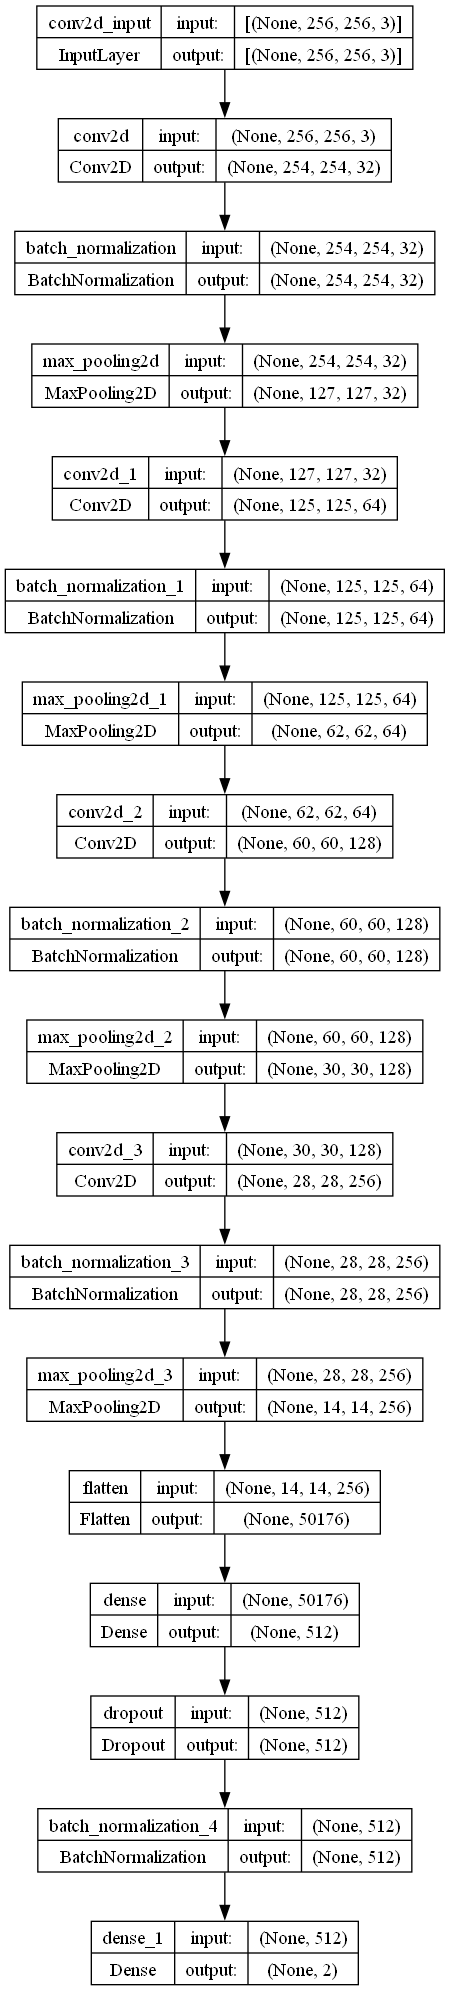

In [11]:
from tensorflow.keras.utils import plot_model

plot_model(model, 
           to_file = 'model_plot_00.png', 
           show_shapes = True, 
           show_layer_names = True)

#### Análisis de la Arquitectura CNN

La estructura del modelo CNN, diseñado para la clasificación de imágenes, se describe en detalle a continuación:

1. **Capa de Entrada (`InputLayer`):** Recibe imágenes con un tamaño de `(256, 256, 3)`, adecuado para imágenes en color (RGB).
   
2. **Primera Capa Convolucional (`conv2d`):** 
   - **Entrada:** Imágenes de entrada con el tamaño especificado.
   - **Salida:** Produce 32 mapas de características de `(254, 254, 32)` utilizando filtros de 3x3.

3. **Normalización por Lotes (`batch_normalization`):** 
   - **Entrada/Salida:** Normaliza las activaciones de la capa convolucional para mejorar la estabilidad del entrenamiento.

4. **Pooling (`max_pooling2d`):** 
   - **Entrada:** Toma los 32 mapas de características.
   - **Salida:** Reduce las dimensiones espaciales a la mitad, resultando en `(127, 127, 32)`.

5. **Segunda Capa Convolucional (`conv2d_1`):** 
   - **Entrada:** Procesa la salida del pooling anterior.
   - **Salida:** Incrementa la profundidad a 64 mapas de características de `(125, 125, 64)`.

6. **Tercera Capa Convolucional (`conv2d_2`):** 
   - **Entrada:** Continúa el procesamiento con mayor profundidad.
   - **Salida:** Produce 128 mapas de características de `(60, 60, 128)`.

7. **Cuarta Capa Convolucional (`conv2d_3`):** 
   - **Entrada:** Acepta la salida de la tercera capa convolucional.
   - **Salida:** Expande a 256 mapas de características de `(28, 28, 256)`.

8. **Aplanamiento (`flatten`):** 
   - **Entrada:** Recibe la salida de la última capa de pooling.
   - **Salida:** Convierte los mapas de características en un vector de 50176 elementos.

9. **Capa Densa (`dense`):** 
   - **Entrada:** Toma el vector aplanado.
   - **Salida:** Capa densa de 512 unidades para aprender patrones complejos.

10. **Regularización (`dropout`):** 
    - **Entrada/Salida:** Aplica Dropout para prevenir el sobreajuste, manteniendo 512 unidades.

11. **Normalización por Lotes (`batch_normalization_4`):** 
    - **Entrada/Salida:** Continúa la normalización para estabilizar el entrenamiento antes de la clasificación final.

12. **Capa de Salida (`dense_1`):** 
    - **Entrada:** La salida de la capa densa con regularización.
    - **Salida:** 2 unidades correspondientes a las categorías de perros y gatos, utilizando activación 'softmax' para la clasificación.

Este modelo, con su enfoque en la extracción de características a través de la convolución, normalización y pooling, seguido de capas densas para la clasificación, está bien equiado para tareas de reconocimiento de imágenes.



In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Callback para el EarlyStopping
early_stopping_cb = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

# El callback ModelCheckpoint guardará el mejor modelo en la carpeta 'trainModels' en el formato nativo de Keras
checkpoint_cb = ModelCheckpoint('./trainModels/mi_modelo_mejor', save_best_only=True)

# Entrenar el modelo, guardando el mejor modelo con ModelCheckpoint
historia = model.fit(
    train_generator,
    epochs=40,
    validation_data=validation_generator,
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/40
63/63 [==============================] - ETA: 0s - loss: 1.0060 - accuracy: 0.5930INFO:tensorflow:Assets written to: ./trainModels\mi_modelo_mejor\assets


INFO:tensorflow:Assets written to: ./trainModels\mi_modelo_mejor\assets


63/63 [==============================] - 67s 1s/step - loss: 1.0060 - accuracy: 0.5930 - val_loss: 0.9933 - val_accuracy: 0.5940
Epoch 2/40
63/63 [==============================] - 65s 1s/step - loss: 0.6538 - accuracy: 0.6975 - val_loss: 1.1551 - val_accuracy: 0.6160
Epoch 3/40
63/63 [==============================] - ETA: 0s - loss: 0.5428 - accuracy: 0.7375INFO:tensorflow:Assets written to: ./trainModels\mi_modelo_mejor\assets


INFO:tensorflow:Assets written to: ./trainModels\mi_modelo_mejor\assets


63/63 [==============================] - 67s 1s/step - loss: 0.5428 - accuracy: 0.7375 - val_loss: 0.7355 - val_accuracy: 0.6670
Epoch 4/40
63/63 [==============================] - 65s 1s/step - loss: 0.4465 - accuracy: 0.7915 - val_loss: 0.8565 - val_accuracy: 0.5910
Epoch 5/40
63/63 [==============================] - 66s 1s/step - loss: 0.3839 - accuracy: 0.8215 - val_loss: 0.8153 - val_accuracy: 0.6200
Epoch 6/40
63/63 [==============================] - ETA: 0s - loss: 0.3154 - accuracy: 0.8675INFO:tensorflow:Assets written to: ./trainModels\mi_modelo_mejor\assets


INFO:tensorflow:Assets written to: ./trainModels\mi_modelo_mejor\assets


63/63 [==============================] - 66s 1s/step - loss: 0.3154 - accuracy: 0.8675 - val_loss: 0.6158 - val_accuracy: 0.7150
Epoch 7/40
63/63 [==============================] - 67s 1s/step - loss: 0.2413 - accuracy: 0.9000 - val_loss: 0.6254 - val_accuracy: 0.7140
Epoch 8/40
63/63 [==============================] - 67s 1s/step - loss: 0.2234 - accuracy: 0.9095 - val_loss: 0.6305 - val_accuracy: 0.7430
Epoch 9/40
63/63 [==============================] - 68s 1s/step - loss: 0.1946 - accuracy: 0.9210 - val_loss: 0.7535 - val_accuracy: 0.7340
Epoch 10/40
63/63 [==============================] - 68s 1s/step - loss: 0.1211 - accuracy: 0.9550 - val_loss: 0.7329 - val_accuracy: 0.7090
Epoch 11/40
63/63 [==============================] - 68s 1s/step - loss: 0.1121 - accuracy: 0.9545 - val_loss: 0.8318 - val_accuracy: 0.7180
Epoch 12/40
63/63 [==============================] - 68s 1s/step - loss: 0.0915 - accuracy: 0.9665 - val_loss: 0.8188 - val_accuracy: 0.7380
Epoch 13/40
63/63 [=========

In [13]:
test_loss, test_acc = model.evaluate(test_generator)

24/24 [==============================] - 9s 292ms/step - loss: 0.9048 - accuracy: 0.6043


In [14]:
print('test_acc:', test_acc)

test_acc: 0.6043360233306885


#### Evaluación y Conclusiones del Entrenamiento con ModelCheckpoint y EarlyStopping

La implementación de `ModelCheckpoint` y `EarlyStopping` en el entrenamiento del modelo CNN ha dado lugar a una serie de resultados y tendencias a lo largo de 26 épocas que son clave para evaluar la efectividad del modelo y las estrategias de regularización empleadas.

**Resultados de Entrenamiento:**
- La precisión en el entrenamiento comienza en un 59.3% y mejora significativamente a lo largo de las épocas, alcanzando un 98.6%.
- La pérdida en el entrenamiento disminuye desde 1.0060 hasta 0.0456, lo que indica una mejoría en la capacidad del modelo para clasificar correctamente las imágenes durante el entrenamiento.

**Resultados de Validación:**
- La precisión en la validación mejora inicialmente, alcanzando un pico de 77.9% en la época 19, pero no muestra una tendencia estable después de eso.
- La pérdida de validación muestra una disminución inicial y luego fluctúa, llegando a incrementarse en las últimas épocas, lo que sugiere que el modelo puede estar empezando a sobreajustarse a los datos de entrenamiento.

**Resultados del Test:**
- La precisión en el conjunto de test es del 60.43%, lo que indica que el modelo no está generalizando tan bien como se observa en los datos de entrenamiento.
- La pérdida en el conjunto de test es de 0.9048, que es mayor que la pérdida de validación más baja observada, reforzando la idea de que el modelo podría estar sobreajustado.

**Conclusiones:**
- La estrategia de `EarlyStopping` con una paciencia de 20 épocas ha permitido al modelo detener el entrenamiento antes de que el sobreajuste se convirtiera en un problema más grave, aunque podría ser beneficioso experimentar con una paciencia más baja. En pruebas anteriores habia probado con una paciencia de 5 y 10 pero detenia el entrenamiento demasiado pronto, aun así, como he comentado, puede que una paciencia un poco más baja sea más beneficiosa.
- La precisión de test sugiere que, aunque el modelo se desempeña bien en los datos de entrenamiento, no está generalizando de manera efectiva a nuevos datos.
- Sería recomendable experimentar con técnicas adicionales de regularización, como aumentar la tasa de Dropout o implementar la normalización de pesos.
- Ajustar la tasa de aprendizaje o la introducción de la reducción de la tasa de aprendizaje en función del rendimiento del modelo en el conjunto de validación podría proporcionar mejoras en la generalización.
- Explorar la ampliación del conjunto de datos o la implementación de técnicas avanzadas de aumento de datos podría ayudar a mejorar la robustez y la generalización del modelo.

En resumen, el modelo muestra un desempeño prometedor pero aún hay espacio para mejorar la generalización y la precisión en datos no vistos. Es crucial continuar con la optimización de hiperparámetros y técnicas de regularización para lograr un equilibrio entre aprendizaje y generalización.

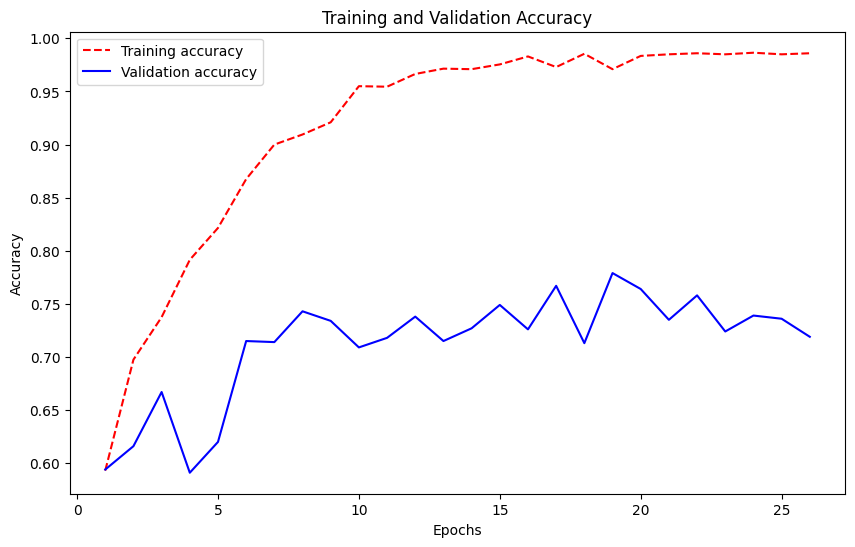

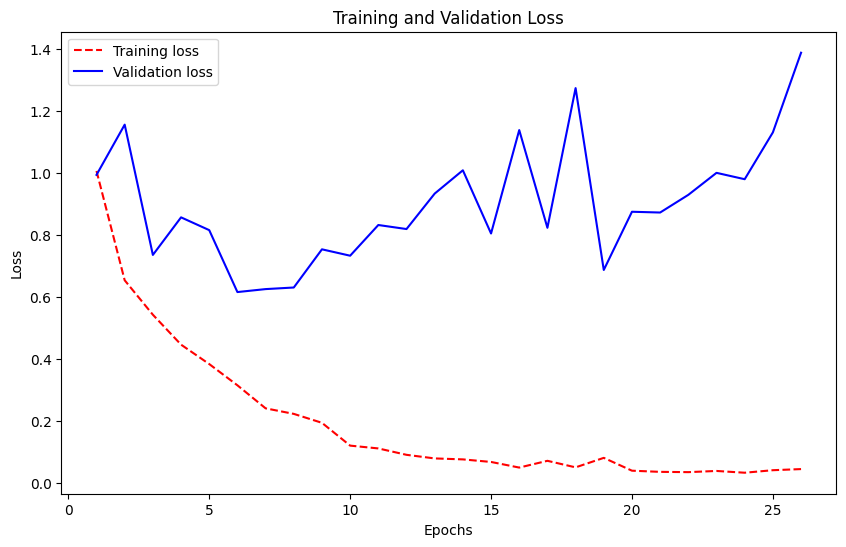

In [15]:
import matplotlib.pyplot as plt

acc = historia.history['accuracy'] 
val_acc = historia.history['val_accuracy'] 
loss = historia.history['loss']
val_loss = historia.history['val_loss']

epochs = range(1, len(acc) + 1)

# Gráfico de precisión (accuracy)
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'r--', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Gráfico de pérdida (loss)
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### Análisis de Precisión en Entrenamiento y Validación

La gráfica muestra la evolución de la precisión del modelo CNN durante el entrenamiento y la validación a lo largo de varias épocas:

- **Precisión del Entrenamiento (Línea Azul):** Esta métrica mejora constantemente, alcanzando un valor cercano al 95% hacia el final de las épocas. Esto indica que el modelo se está ajustando bien a los datos de entrenamiento y aprendiendo efectivamente las características de las imágenes.

- **Precisión de la Validación (Línea Roja):** Hay una variabilidad significativa, con una tendencia generalmente estacionaria o descendente, manteniéndose alrededor del 70%. Esto sugiere que el modelo no generaliza tan bien en datos no vistos, lo que podría ser un indicativo de sobreajuste.


#### Evaluación de Precisión y Pérdida del Modelo

Las dos gráficas proporcionan una visión clara de la evolución del entrenamiento del modelo a lo largo de las épocas.

**Precisión (Accuracy):**
- La precisión de entrenamiento muestra un patrón ascendente constante, lo que indica que el modelo está aprendiendo efectivamente de los datos de entrenamiento.
- La precisión de validación, sin embargo, muestra más variabilidad y no mejora al mismo ritmo que la precisión de entrenamiento. Este comportamiento sugiere que el modelo podría estar sobreajustándose a los datos de entrenamiento y no generalizando bien a los nuevos datos.

**Pérdida (Loss):**
- La pérdida de entrenamiento disminuye de manera constante, lo cual es un buen indicador de aprendizaje.
- La pérdida de validación, en contraste, no muestra una tendencia descendente clara y fluctúa a lo largo de las épocas. Esto reitera la posibilidad de sobreajuste, ya que el modelo parece no mejorar su capacidad de generalización con el conjunto de validación.

#### Conclusiones Finales

- El modelo actual muestra una tendencia al sobreajuste, indicada por la alta precisión en el entrenamiento en comparación con la validación y la prueba. Esto resalta la necesidad de una estrategia de regularización más efectiva para mejorar la generalización.

- La implementación de técnicas de aumento de datos podría no ser suficiente en su forma actual. Es necesario revisar la intensidad y variedad de las transformaciones aplicadas para proporcionar al modelo un conjunto de entrenamiento más diverso y representativo.

- La configuración del early stopping podría ser demasiado tolerante, permitiendo que el modelo continúe aprendiendo a pesar de no mejorar en la validación. Ajustar la paciencia y complementarla con una reducción progresiva de la tasa de aprendizaje podría prevenir el sobreajuste de manera más efectiva.

- La baja precisión en el conjunto de prueba es una señal de alerta que confirma las dificultades del modelo para generalizar. Se sugiere explorar un ajuste fino de hiperparámetros y considerar la adición de capas o nodos adicionales para mejorar el rendimiento.


Es claro que el modelo necesita una combinación de ajustes en la arquitectura, la regularización y la estrategia de entrenamiento. La atención a estos detalles será crucial para alcanzar un modelo que no solo aprenda de los datos de entrenamiento sino que también pueda aplicar ese aprendizaje a datos nuevos y desconocidos de manera efectiva.

1/1 [==============================] - 0s 130ms/step


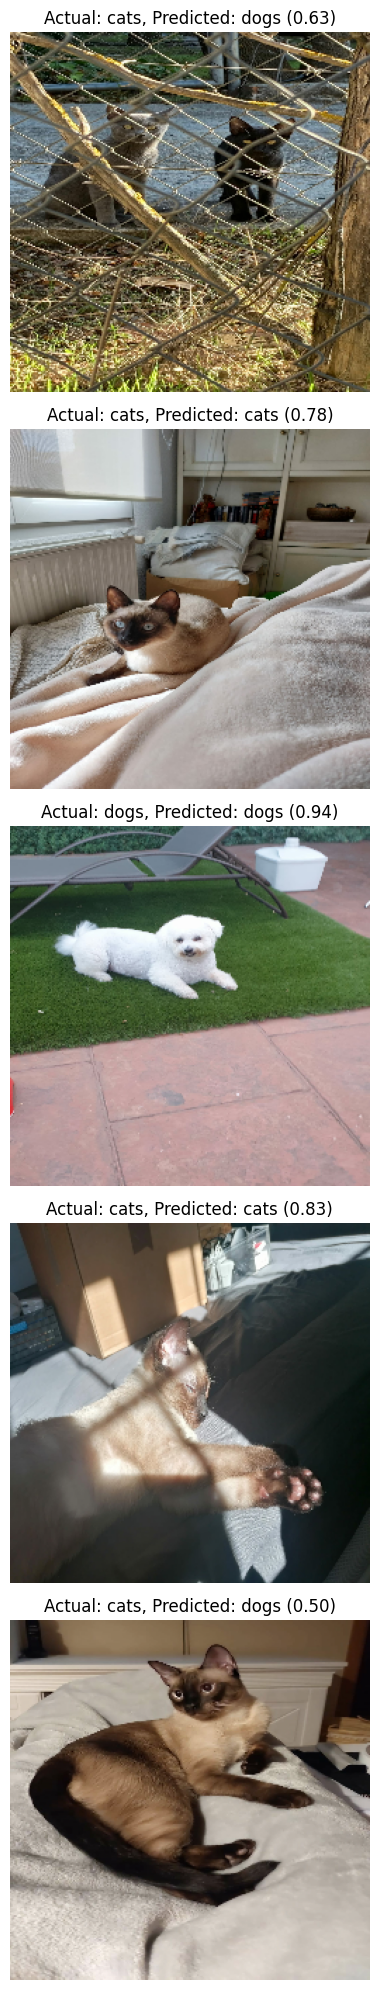

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Obtener un lote de imágenes y etiquetas del generador
for images, labels in test_generator.take(1):
    break  # Solo necesitamos un lote

# Seleccionar un subconjunto de imágenes y etiquetas para mostrar
num_images_to_display = 5
selected_images = images[:num_images_to_display]
selected_labels = labels[:num_images_to_display]

# Hacer predicciones con el modelo
predictions = model.predict(selected_images)

# Mapeo de etiquetas
class_names = test_generator.class_names

# Visualizar las imágenes con las etiquetas predichas y las reales
fig, axes = plt.subplots(num_images_to_display, 1, figsize=(12, num_images_to_display * 4))
for i in range(num_images_to_display):
    ax = axes[i]
    # Convertir el tensor a un array de NumPy y cambiar el tipo de datos
    image = tf.keras.preprocessing.image.array_to_img(selected_images[i])
    ax.imshow(image)
    ax.axis('off')
    actual_label_index = np.argmax(selected_labels[i])
    predicted_label_index = np.argmax(predictions[i])
    actual_label = class_names[actual_label_index]
    predicted_label = class_names[predicted_label_index]
    confidence = np.max(predictions[i])
    ax.set_title(f"Actual: {actual_label}, Predicted: {predicted_label} ({confidence:.2f})")

plt.tight_layout()
plt.show()

#### Observaciones de Predicciones del Modelo

Como se puede observar en las predicciones generadas por el modelo, existen errores en la clasificación. A pesar de que el modelo ha sido entrenado y configurado con una arquitectura específica, la precisión de las predicciones no es perfecta, lo cual es un fenómeno común en la práctica del aprendizaje automático. Estos errores subrayan la necesidad de un análisis más profundo y posiblemente una mayor optimización o ajustes en el entrenamiento del modelo. La evaluación continua del rendimiento del modelo en un conjunto diverso de datos es esencial para mejorar su capacidad de generalización y su desempeño en la clasificación de nuevas imágenes.


# 3. Transfer Learning & Fine Tuning

Su ejecución se encuentra en el notebook:
- 599_3_Transfer_Learning_VGG16_2023

# 4. Visualización de capas intermedias

Su ejecución se encuentra en el notebook:
- 599_3_Transfer_Learning_VGG16_2023

# 5. Data Augmentation

Su ejecución se encuentra en el notebook:
- 599_5_CNN_Data_Augmentation_2023

# 6. Recursos

- jorditorresBCN. (s. f.-a). Python-deep-learning/08_Redes_neuronales_convolucionales.ipynb at Master · jorditorresBCN/python-deep-learning. GitHub. https://github.com/jorditorresBCN/python-deep-learning/blob/master/08_redes_neuronales_convolucionales.ipynb
- jorditorresBCN. (s. f.). Python-deep-learning/11_DataAugmentation_y_TransferLearning.ipynb at Master · jorditorresBCN/python-deep-learning. GitHub. https://github.com/jorditorresBCN/python-deep-learning/blob/master/11_DataAugmentation_y_TransferLearning.ipynb
- Jauregui, A. F. (2023, 24 agosto). Qué son y cómo crear una red neuronal convolucional con Keras. Ander Fernández. https://anderfernandez.com/blog/que-es-una-red-neuronal-convolucional-y-como-crearlaen-keras/
- Gonzalez, S. (2021, 13 octubre). Redes neuronales para clasificar imágenes: TensorFlow y Keras. Model Differently. https://www.modeldifferently.com/2021/10/image_classification/